<a href="https://colab.research.google.com/github/nsmsm/ASL/blob/master/1_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터를 이용하여 손글씨를 식별하는 DNN 구축하기.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.3.0


In [ ]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
#fashion_mnist = datasets.fashion_mnist
#(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = train_x/255.0
test_x = test_x/255.0

print(train_x.shape)

(60000, 28, 28)


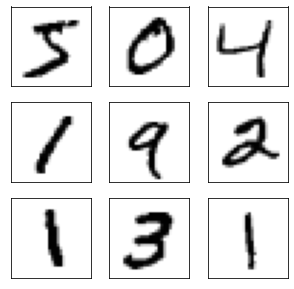

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for col1 in range(9):
  plt.subplot(3,3,col1+1)
  plt.imshow(train_x[col1], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


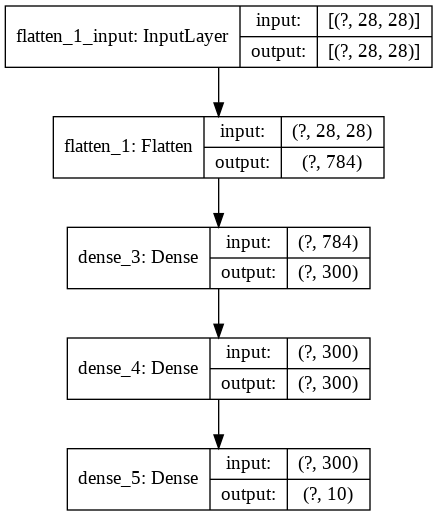

In [ ]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)
model.summary()

plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)

Epoch 1/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2461 - accuracy: 0.9286 - val_loss: 0.0998 - val_accuracy: 0.9725
Epoch 2/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.9721 - val_loss: 0.0857 - val_accuracy: 0.9757
Epoch 3/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0594 - accuracy: 0.9815 - val_loss: 0.0786 - val_accuracy: 0.9747
Epoch 4/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0906 - val_accuracy: 0.9743
Epoch 5/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0763 - val_accuracy: 0.9787
Epoch 6/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0783 - val_accuracy: 0.9790
Epoch 7/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0783 - val_accuracy: 0.9818
Epoch 

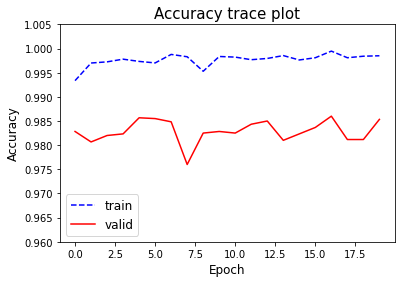

313/313 [==============================] - 1s 2ms/step - loss: 0.1105 - accuracy: 0.9827
##########################
accuracy: 0.983, loss: 0.111


In [ ]:
plt.plot(hist.history['accuracy'], 'b--', label='train')
plt.plot(hist.history['val_accuracy'], 'r-', label='valid')
plt.ylim([0.96,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))

In [ ]:
sc

[0.11050285398960114, 0.982699990272522]

In [ ]:
sc.history

AttributeError: ignored

In [ ]:
sc

[0.11050285398960114, 0.982699990272522]